In [1]:
# BMD Prediction - Notebook Workflow
# Phase 1: Setup and Imports

%matplotlib inline
import os, sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Import project modules (won't run main())
from BMD_Prediction import (
    Config,
    set_seed,
    create_dataloaders,
    CNNWithMetadata,
    CNNTrainer,
    SVMWithCNNFeatures,
    Visualizer
)

# Ensure output directories exist
os.makedirs(Config.OUTPUT_DIR, exist_ok=True)
os.makedirs(Config.MODEL_DIR, exist_ok=True)
os.makedirs(Config.RESULTS_DIR, exist_ok=True)
os.makedirs(Config.PLOTS_DIR, exist_ok=True)

print(f"Device: {Config.DEVICE}")
print(f"Outputs -> {Config.OUTPUT_DIR}")
set_seed(Config.RANDOM_SEED)


Device: cpu
Outputs -> C:/Users/HP/Desktop/BMD Project 01/Outputs


In [2]:
# Phase 2: Data Loading

train_loader, val_loader, test_loader = create_dataloaders()
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")


Loaded 377 samples from C:/Users/HP/Desktop/BMD Project 01/CSV Files/train_groundtruth_BMD_only.csv
BMD range: 0.633 - 1.465
Loaded 54 samples from C:/Users/HP/Desktop/BMD Project 01/CSV Files/val_groundtruth_BMD_only.csv
BMD range: 0.659 - 1.295
Loaded 108 samples from C:/Users/HP/Desktop/BMD Project 01/CSV Files/test_public_new.csv
Training samples: 377
Validation samples: 54
Test samples: 108


In [3]:
# Phase 3: Train CNN (with class weights)

from BMD_Prediction import calculate_class_weights

cnn_model = CNNWithMetadata(pretrained=True, freeze_backbone=Config.FREEZE_BACKBONE)
class_weights = calculate_class_weights(Config.TRAIN_CSV)

cnn_trainer = CNNTrainer(cnn_model, train_loader, val_loader, class_weights=class_weights)
cnn_save_path = os.path.join(Config.MODEL_DIR, 'best_cnn_model.pth')
cnn_history = cnn_trainer.train(num_epochs=Config.NUM_EPOCHS, save_path=cnn_save_path)

cnn_val_results = cnn_trainer.validate()
print({k: round(v,4) if isinstance(v, (int,float)) else '...' for k,v in cnn_val_results.items() if k in ['mae','rmse','r2','accuracy']})



Class distribution in training set:
  Low BMD (0): 12 samples
  Normal (1): 365 samples
  Class weights: tensor([15.7083,  0.5164])
BMD stats -> mean: 0.9654, std: 0.1504
Using focal loss with alpha (class weights): tensor([15.7083,  0.5164])

Starting training on cpu...

Epoch 1/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]



Train - Loss: 3.2086 | MAE: 0.3125 | Acc: 0.4801
Val   - Loss: 2.1811 | MAE: 0.1157 | Acc: 0.1296

✓ New best model saved!

Epoch 2/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.76s/it]



Train - Loss: 2.2554 | MAE: 0.2240 | Acc: 0.5225
Val   - Loss: 2.6930 | MAE: 0.1157 | Acc: 0.2778

Epoch 3/50

Unfreezing backbone for fine-tuning...


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.94s/it]



Train - Loss: 4.0670 | MAE: 0.2242 | Acc: 0.5358
Val   - Loss: 8.0932 | MAE: 0.1156 | Acc: 0.9444

Epoch 4/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]



Train - Loss: 3.3446 | MAE: 0.1836 | Acc: 0.4775
Val   - Loss: 5.1894 | MAE: 0.1141 | Acc: 0.9444

Epoch 5/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]



Train - Loss: 3.0766 | MAE: 0.1674 | Acc: 0.4801
Val   - Loss: 6.8830 | MAE: 0.1157 | Acc: 0.9444

Epoch 6/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]



Train - Loss: 3.1645 | MAE: 0.1757 | Acc: 0.5225
Val   - Loss: 8.2768 | MAE: 0.1153 | Acc: 0.8519

Epoch 7/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]



Train - Loss: 2.7694 | MAE: 0.1516 | Acc: 0.5411
Val   - Loss: 7.8133 | MAE: 0.1149 | Acc: 0.6667

Epoch 8/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]



Train - Loss: 2.8093 | MAE: 0.1561 | Acc: 0.5146
Val   - Loss: 6.4143 | MAE: 0.1105 | Acc: 0.9444

Epoch 9/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]



Train - Loss: 2.5280 | MAE: 0.1417 | Acc: 0.5199
Val   - Loss: 5.5413 | MAE: 0.1137 | Acc: 0.9444

Epoch 10/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]



Train - Loss: 2.4457 | MAE: 0.1379 | Acc: 0.5491
Val   - Loss: 4.8962 | MAE: 0.1138 | Acc: 0.7593

Epoch 11/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]



Train - Loss: 2.5103 | MAE: 0.1424 | Acc: 0.6711
Val   - Loss: 5.5672 | MAE: 0.1146 | Acc: 0.9630

Epoch 12/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]



Train - Loss: 2.3801 | MAE: 0.1343 | Acc: 0.5756
Val   - Loss: 7.3288 | MAE: 0.1133 | Acc: 0.9630

Epoch 13/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]



Train - Loss: 2.3053 | MAE: 0.1312 | Acc: 0.4562
Val   - Loss: 6.6778 | MAE: 0.1109 | Acc: 0.9259

Epoch 14/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]



Train - Loss: 2.1565 | MAE: 0.1243 | Acc: 0.4748
Val   - Loss: 7.5679 | MAE: 0.1138 | Acc: 0.6667

Epoch 15/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]



Train - Loss: 2.3918 | MAE: 0.1349 | Acc: 0.4907
Val   - Loss: 5.7411 | MAE: 0.1147 | Acc: 0.9630

Epoch 16/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]



Train - Loss: 2.0767 | MAE: 0.1200 | Acc: 0.5225
Val   - Loss: 5.1487 | MAE: 0.1144 | Acc: 0.9444

Epoch 17/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]



Train - Loss: 1.9805 | MAE: 0.1145 | Acc: 0.6419
Val   - Loss: 6.3993 | MAE: 0.1137 | Acc: 0.9630

Epoch 18/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.55s/it]



Train - Loss: 2.1182 | MAE: 0.1248 | Acc: 0.8753
Val   - Loss: 6.8820 | MAE: 0.1151 | Acc: 0.9630

Epoch 19/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]



Train - Loss: 2.1423 | MAE: 0.1256 | Acc: 0.8143
Val   - Loss: 7.6685 | MAE: 0.1138 | Acc: 0.9259

Epoch 20/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.88s/it]



Train - Loss: 2.1580 | MAE: 0.1247 | Acc: 0.7294
Val   - Loss: 3.6669 | MAE: 0.1121 | Acc: 0.9630

Epoch 21/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]



Train - Loss: 2.4888 | MAE: 0.1448 | Acc: 0.7692
Val   - Loss: 6.7620 | MAE: 0.1121 | Acc: 0.9259

Epoch 22/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]



Train - Loss: 2.3531 | MAE: 0.1380 | Acc: 0.8329
Val   - Loss: 4.9413 | MAE: 0.1091 | Acc: 0.9444

Epoch 23/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]



Train - Loss: 1.8488 | MAE: 0.1064 | Acc: 0.8435
Val   - Loss: 6.6366 | MAE: 0.1140 | Acc: 0.9630

Epoch 24/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]



Train - Loss: 1.6576 | MAE: 0.0955 | Acc: 0.7321
Val   - Loss: 4.9325 | MAE: 0.1126 | Acc: 0.9444

Epoch 25/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.82s/it]



Train - Loss: 1.8689 | MAE: 0.1079 | Acc: 0.8435
Val   - Loss: 4.3093 | MAE: 0.1131 | Acc: 0.9630

Epoch 26/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.86s/it]



Train - Loss: 1.7970 | MAE: 0.1047 | Acc: 0.8594
Val   - Loss: 5.7854 | MAE: 0.1147 | Acc: 0.9630

Epoch 27/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]



Train - Loss: 1.5925 | MAE: 0.0944 | Acc: 0.9284
Val   - Loss: 5.2297 | MAE: 0.1115 | Acc: 0.9630

Epoch 28/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.80s/it]



Train - Loss: 1.5819 | MAE: 0.0937 | Acc: 0.8329
Val   - Loss: 4.7185 | MAE: 0.1152 | Acc: 0.9444

Epoch 29/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]



Train - Loss: 1.6689 | MAE: 0.0987 | Acc: 0.8886
Val   - Loss: 4.7040 | MAE: 0.1137 | Acc: 0.9444

Epoch 30/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.87s/it]



Train - Loss: 1.7446 | MAE: 0.1015 | Acc: 0.7507
Val   - Loss: 4.8745 | MAE: 0.1130 | Acc: 0.9630

Epoch 31/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.69s/it]



Train - Loss: 1.4311 | MAE: 0.0854 | Acc: 0.9019
Val   - Loss: 4.7581 | MAE: 0.1148 | Acc: 0.9444

Epoch 32/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.54s/it]



Train - Loss: 1.4046 | MAE: 0.0845 | Acc: 0.9204
Val   - Loss: 5.4202 | MAE: 0.1145 | Acc: 0.9630

Epoch 33/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.57s/it]



Train - Loss: 1.7158 | MAE: 0.1037 | Acc: 0.9045
Val   - Loss: 4.1347 | MAE: 0.1142 | Acc: 0.9630

Epoch 34/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]



Train - Loss: 1.8048 | MAE: 0.1095 | Acc: 0.9310
Val   - Loss: 4.9696 | MAE: 0.1136 | Acc: 0.9630

Epoch 35/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]



Train - Loss: 1.7990 | MAE: 0.1065 | Acc: 0.8541
Val   - Loss: 4.2537 | MAE: 0.1136 | Acc: 0.9630

Epoch 36/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]



Train - Loss: 1.4529 | MAE: 0.0838 | Acc: 0.8355
Val   - Loss: 3.1617 | MAE: 0.1109 | Acc: 0.9444

Epoch 37/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.56s/it]



Train - Loss: 1.4087 | MAE: 0.0857 | Acc: 0.9337
Val   - Loss: 4.7602 | MAE: 0.1143 | Acc: 0.9815

Epoch 38/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]



Train - Loss: 1.4790 | MAE: 0.0895 | Acc: 0.9549
Val   - Loss: 4.8523 | MAE: 0.1145 | Acc: 0.9630

Epoch 39/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]



Train - Loss: 1.6049 | MAE: 0.0920 | Acc: 0.7931
Val   - Loss: 4.0125 | MAE: 0.1128 | Acc: 0.9815

Epoch 40/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]



Train - Loss: 1.2184 | MAE: 0.0727 | Acc: 0.9204
Val   - Loss: 4.4180 | MAE: 0.1130 | Acc: 0.9444

Epoch 41/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.63s/it]



Train - Loss: 1.5412 | MAE: 0.0910 | Acc: 0.9416
Val   - Loss: 3.2415 | MAE: 0.1101 | Acc: 0.9630

Epoch 42/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.65s/it]



Train - Loss: 1.5528 | MAE: 0.0928 | Acc: 0.8435
Val   - Loss: 3.2796 | MAE: 0.1104 | Acc: 0.9630

Epoch 43/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]



Train - Loss: 1.3842 | MAE: 0.0812 | Acc: 0.8780
Val   - Loss: 4.6418 | MAE: 0.1140 | Acc: 0.9259

Epoch 44/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]



Train - Loss: 1.3730 | MAE: 0.0835 | Acc: 0.9204
Val   - Loss: 3.9044 | MAE: 0.1142 | Acc: 0.9630

Epoch 45/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]



Train - Loss: 1.5478 | MAE: 0.0910 | Acc: 0.9231
Val   - Loss: 2.8710 | MAE: 0.1108 | Acc: 0.9630

Epoch 46/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.84s/it]



Train - Loss: 1.4940 | MAE: 0.0883 | Acc: 0.8488
Val   - Loss: 4.8138 | MAE: 0.1145 | Acc: 0.9444

Epoch 47/50


Validation: 100%|██████████| 4/4 [00:07<00:00,  1.83s/it]



Train - Loss: 1.6086 | MAE: 0.0969 | Acc: 0.9072
Val   - Loss: 3.4462 | MAE: 0.1128 | Acc: 0.9630

Epoch 48/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.62s/it]



Train - Loss: 1.5138 | MAE: 0.0926 | Acc: 0.9602
Val   - Loss: 3.3209 | MAE: 0.1130 | Acc: 0.9444

Epoch 49/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]



Train - Loss: 1.4631 | MAE: 0.0837 | Acc: 0.8912
Val   - Loss: 3.6958 | MAE: 0.1138 | Acc: 0.9630

Epoch 50/50


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]



Train - Loss: 1.5497 | MAE: 0.0920 | Acc: 0.8886
Val   - Loss: 3.4917 | MAE: 0.1112 | Acc: 0.9630


Validation: 100%|██████████| 4/4 [00:06<00:00,  1.61s/it]

{'mae': 0.1112, 'rmse': np.float64(0.1387), 'r2': 0.0699, 'accuracy': 0.963}


In [4]:
# Phase 4: Train SVM on CNN features

svm_model = SVMWithCNNFeatures(cnn_model)
svm_train_metrics, svm_val_metrics = svm_model.train(train_loader, val_loader)
svm_save_path = os.path.join(Config.MODEL_DIR, 'svm_model.pkl')
svm_model.save(svm_save_path)

print({k: round(v,4) if isinstance(v, (int,float)) else '...' for k,v in svm_val_metrics.items() if k in ['mae','rmse','r2','accuracy']})



Training SVM with CNN Features

Extracting training features...


Extracting features: 100%|██████████| 24/24 [00:18<00:00,  1.32it/s]


Scaling features...

Training SVM on 377 samples...

Training Metrics:
  MAE: 0.0099
  RMSE: 0.0165
  R²: 0.9907
  Accuracy: 0.9894

Extracting validation features...


Extracting features: 100%|██████████| 4/4 [00:06<00:00,  1.58s/it]

  Optimal T-score threshold: 0.15 (default: -1.0)

Validation Metrics:
  MAE: 0.0985
  RMSE: 0.1252
  R²: 0.2420
  Accuracy: 0.9074
SVM model saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/models\svm_model.pkl
{'mae': 0.0985, 'rmse': np.float64(0.1252), 'r2': 0.242, 'accuracy': 0.9074}


Training history saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\training_history.png


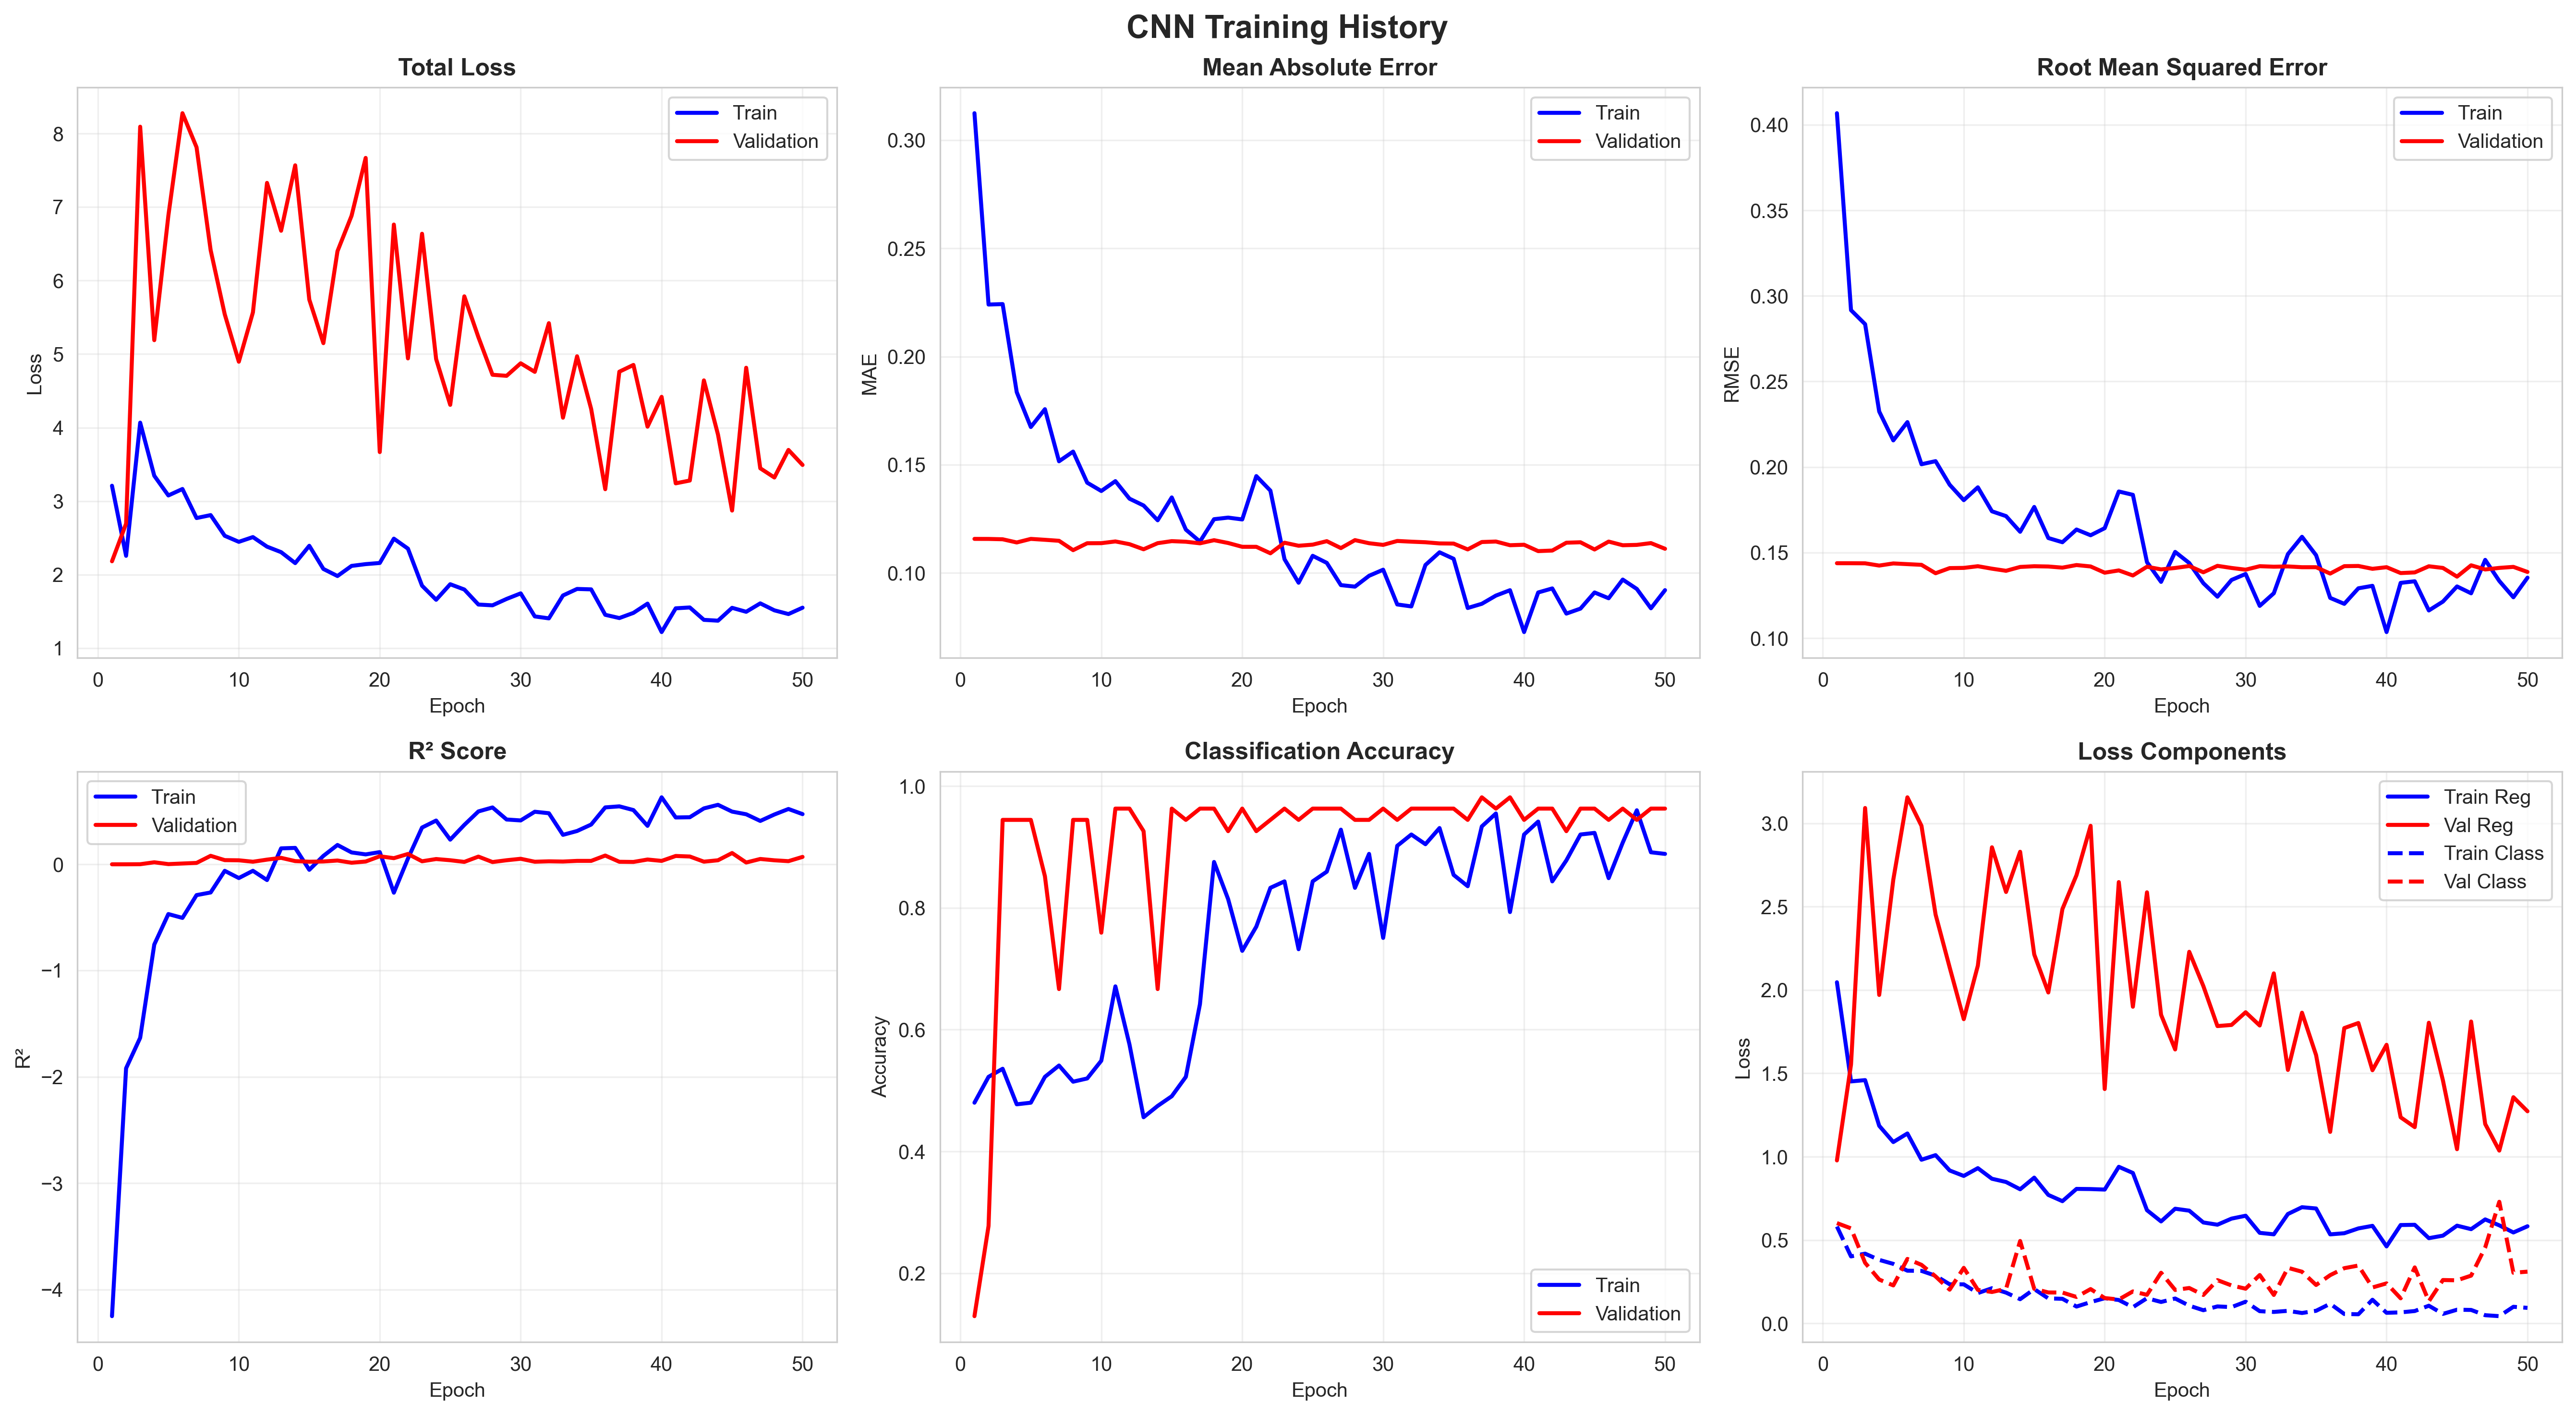

In [5]:
# Phase 5: Visualizations (save to disk and display inline)

visualizer = Visualizer(Config.PLOTS_DIR)

# Training history
visualizer.plot_training_history(cnn_history)
Image(filename=os.path.join(Config.PLOTS_DIR, 'training_history.png'))


Confusion matrix saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\confusion_matrix_cnn.png


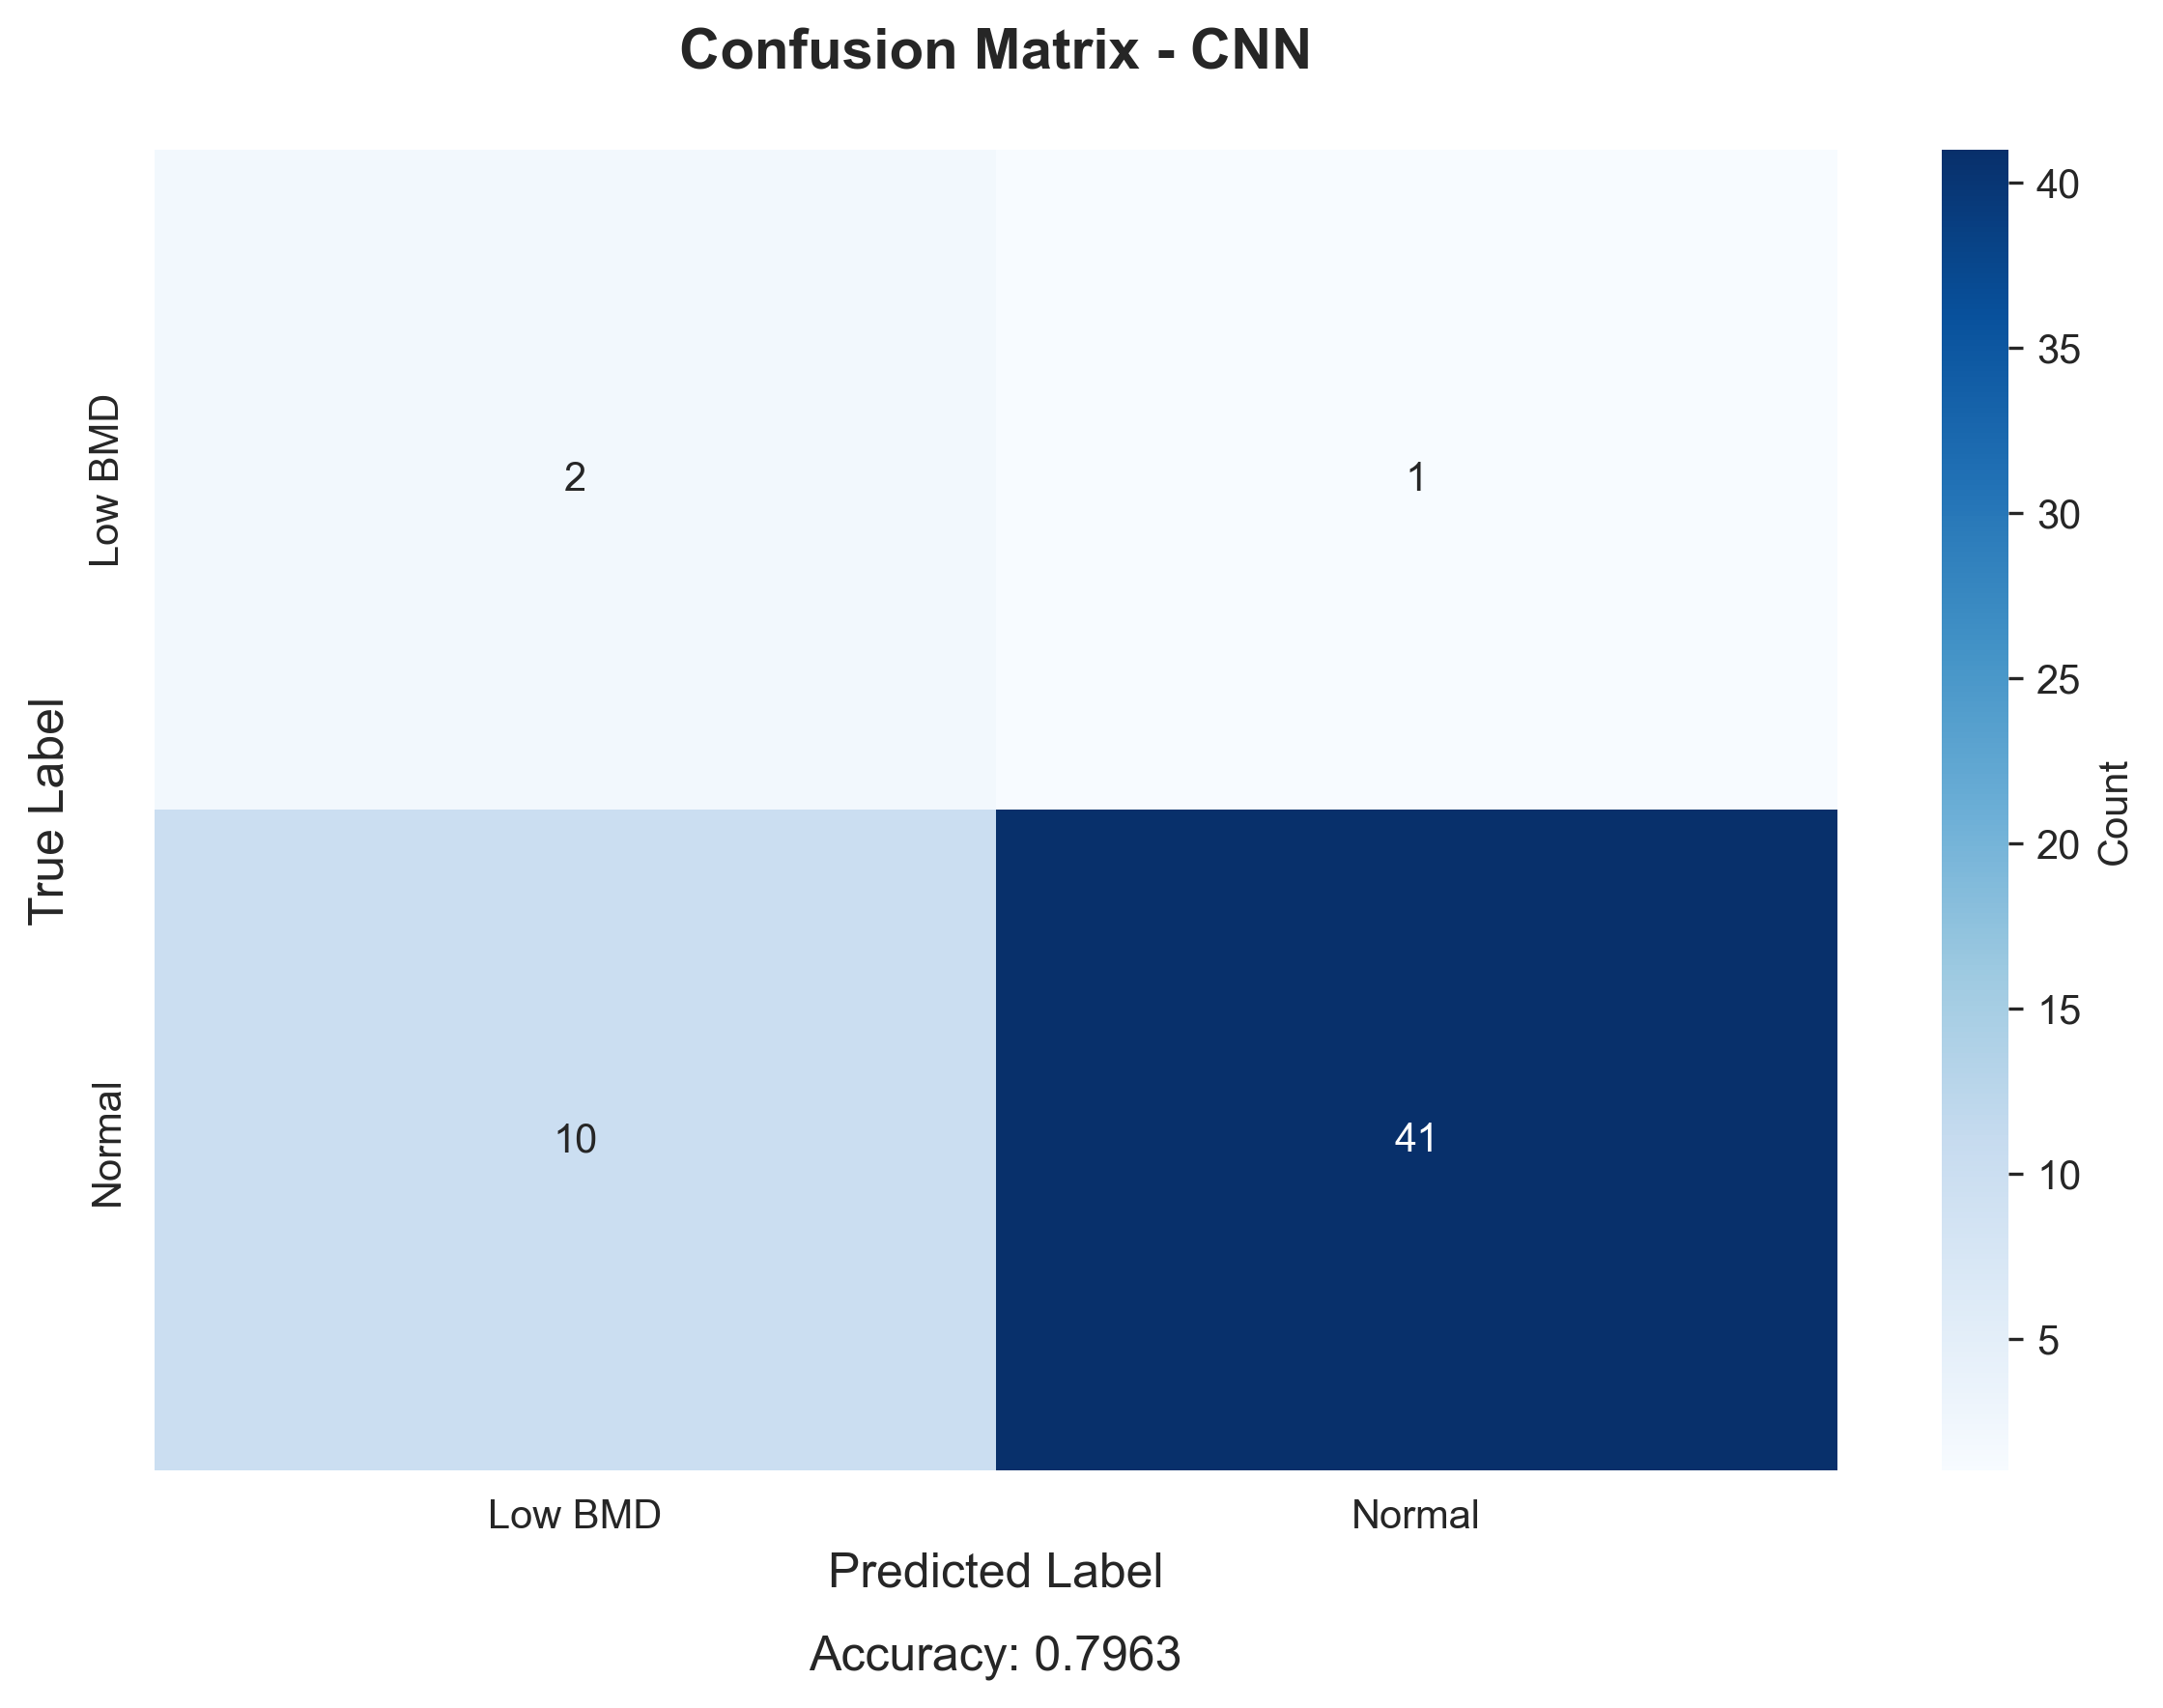

In [6]:
# Phase 6: Confusion Matrices & ROC

# CNN confusion
visualizer.plot_confusion_matrix(
    cnn_val_results['class_true'],
    cnn_val_results['class_pred'],
    'CNN', 'confusion_matrix_cnn.png'
)
Image(filename=os.path.join(Config.PLOTS_DIR, 'confusion_matrix_cnn.png'))


Confusion matrix saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\confusion_matrix_svm.png


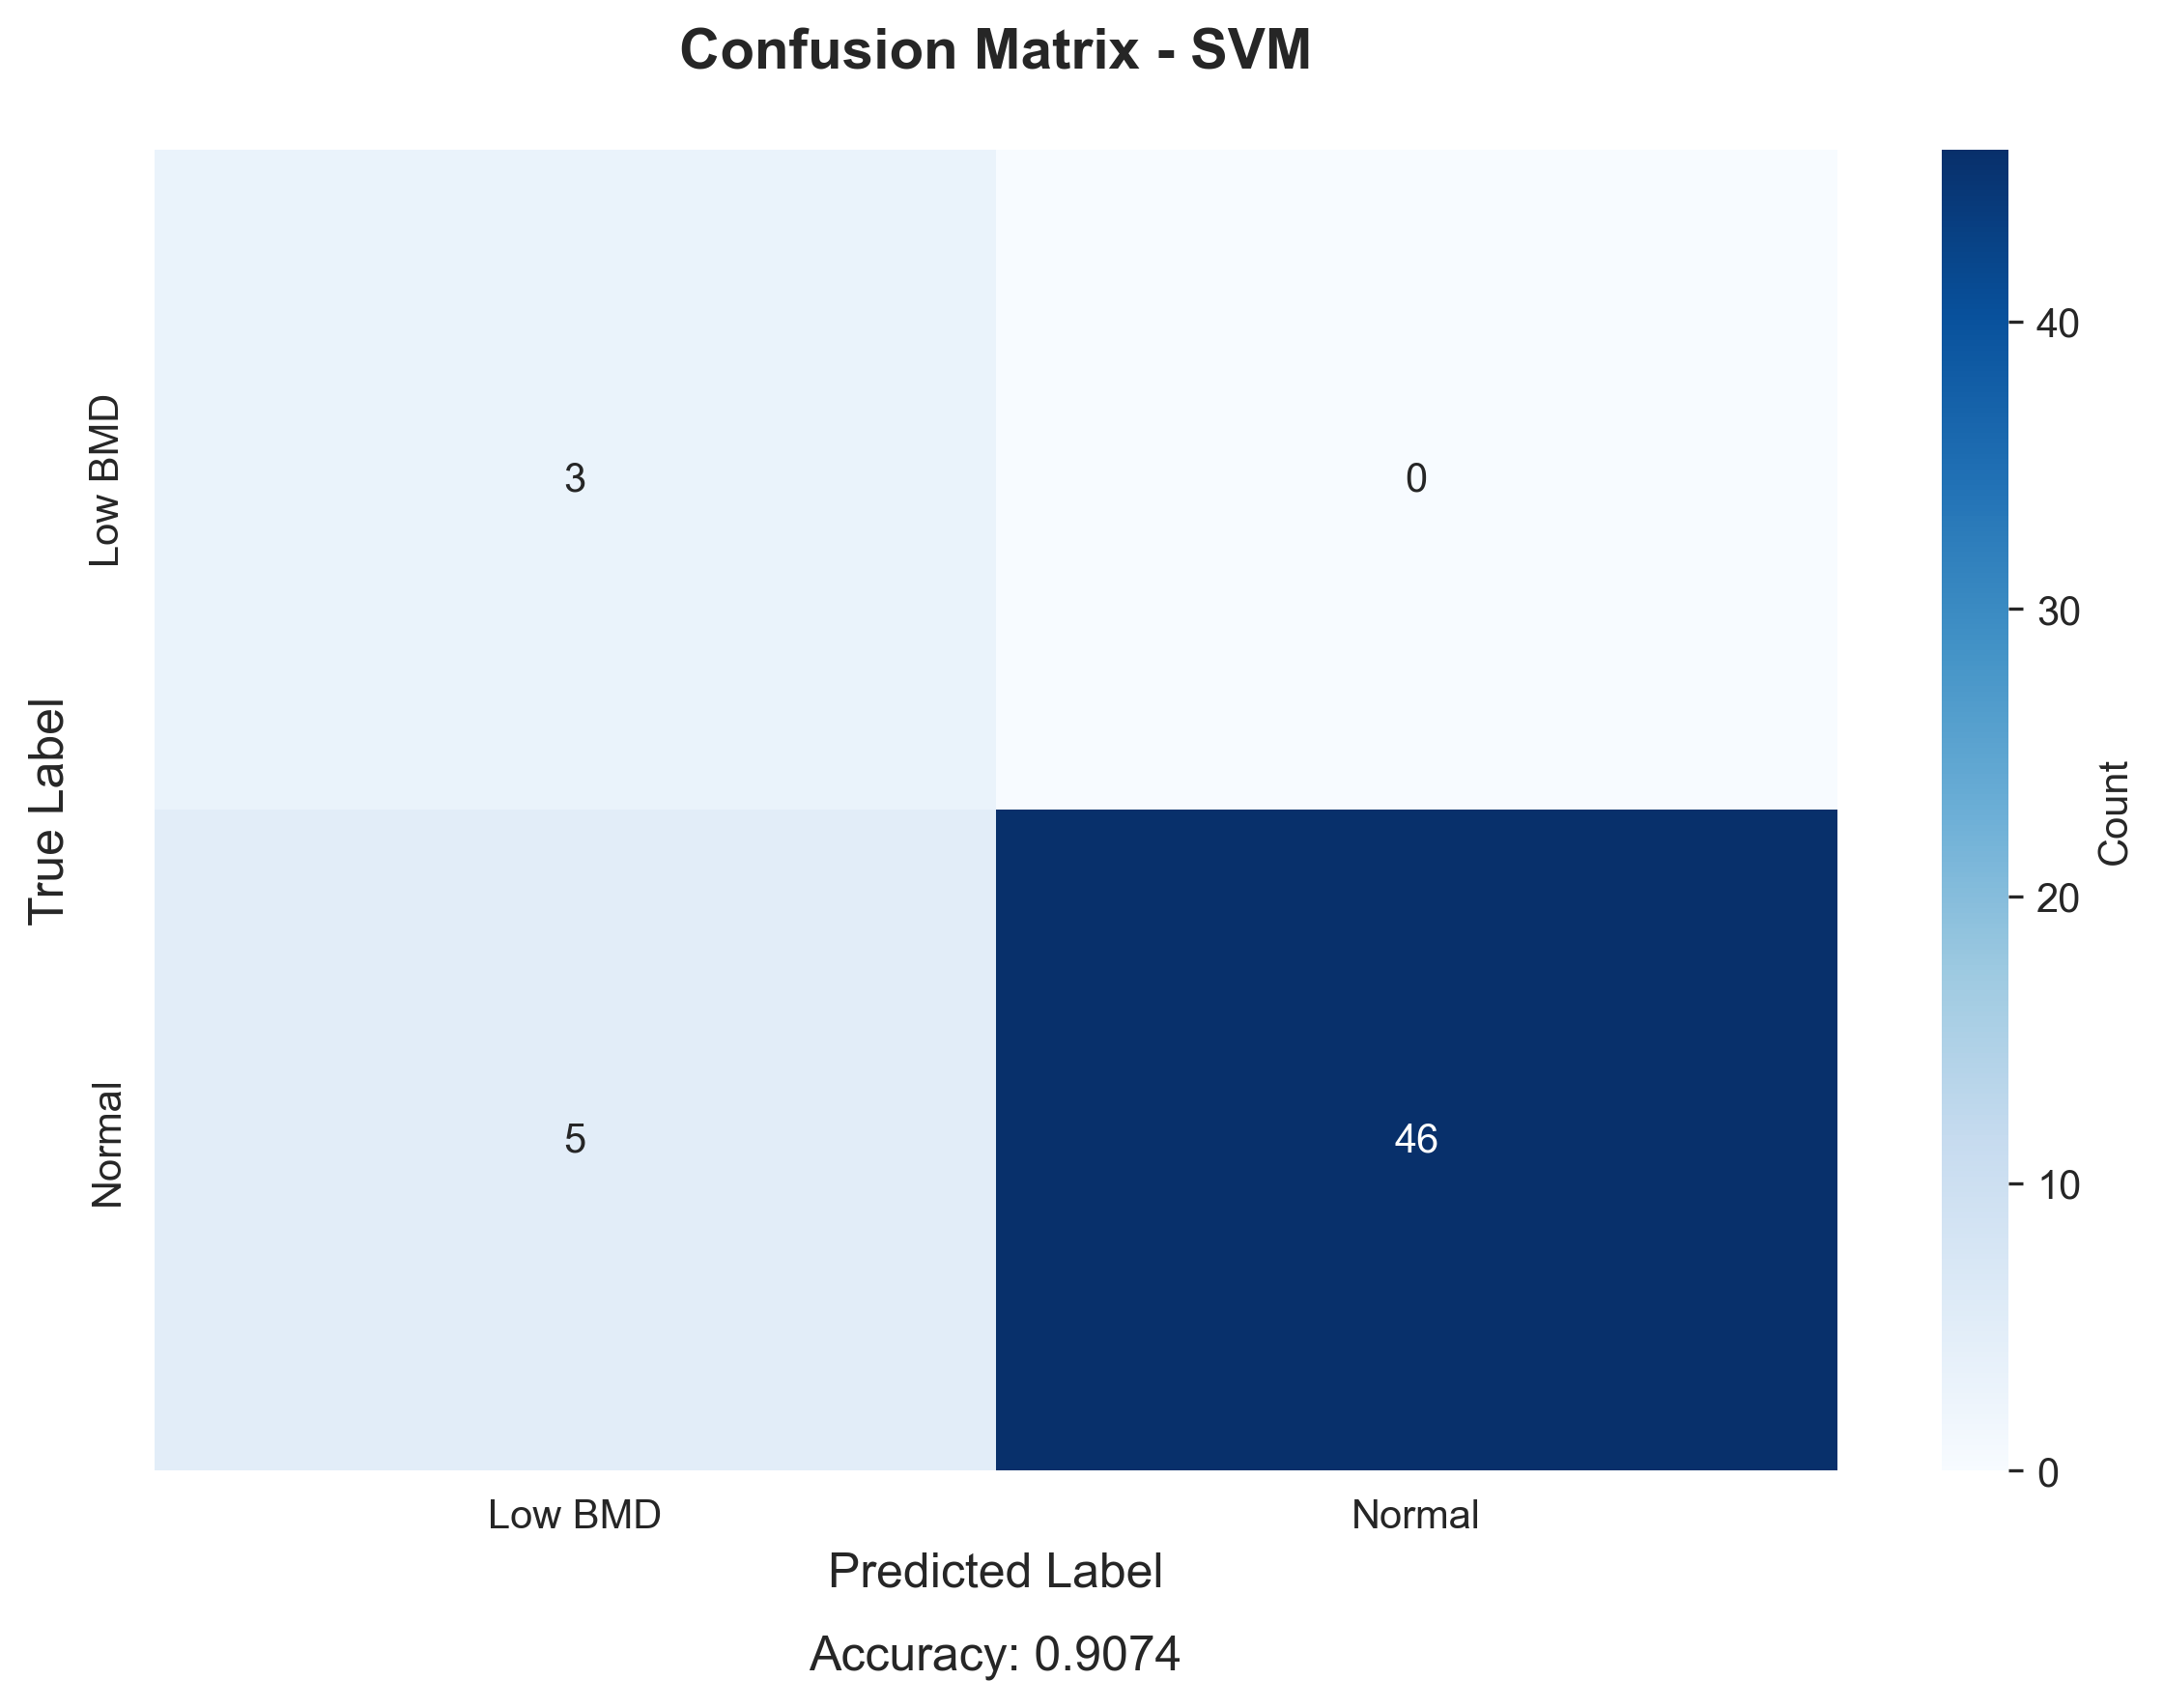

In [7]:
# SVM confusion
visualizer.plot_confusion_matrix(
    svm_val_metrics['class_true'],
    svm_val_metrics['class_pred'],
    'SVM', 'confusion_matrix_svm.png'
)
Image(filename=os.path.join(Config.PLOTS_DIR, 'confusion_matrix_svm.png'))


ROC curve saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\roc_curve.png


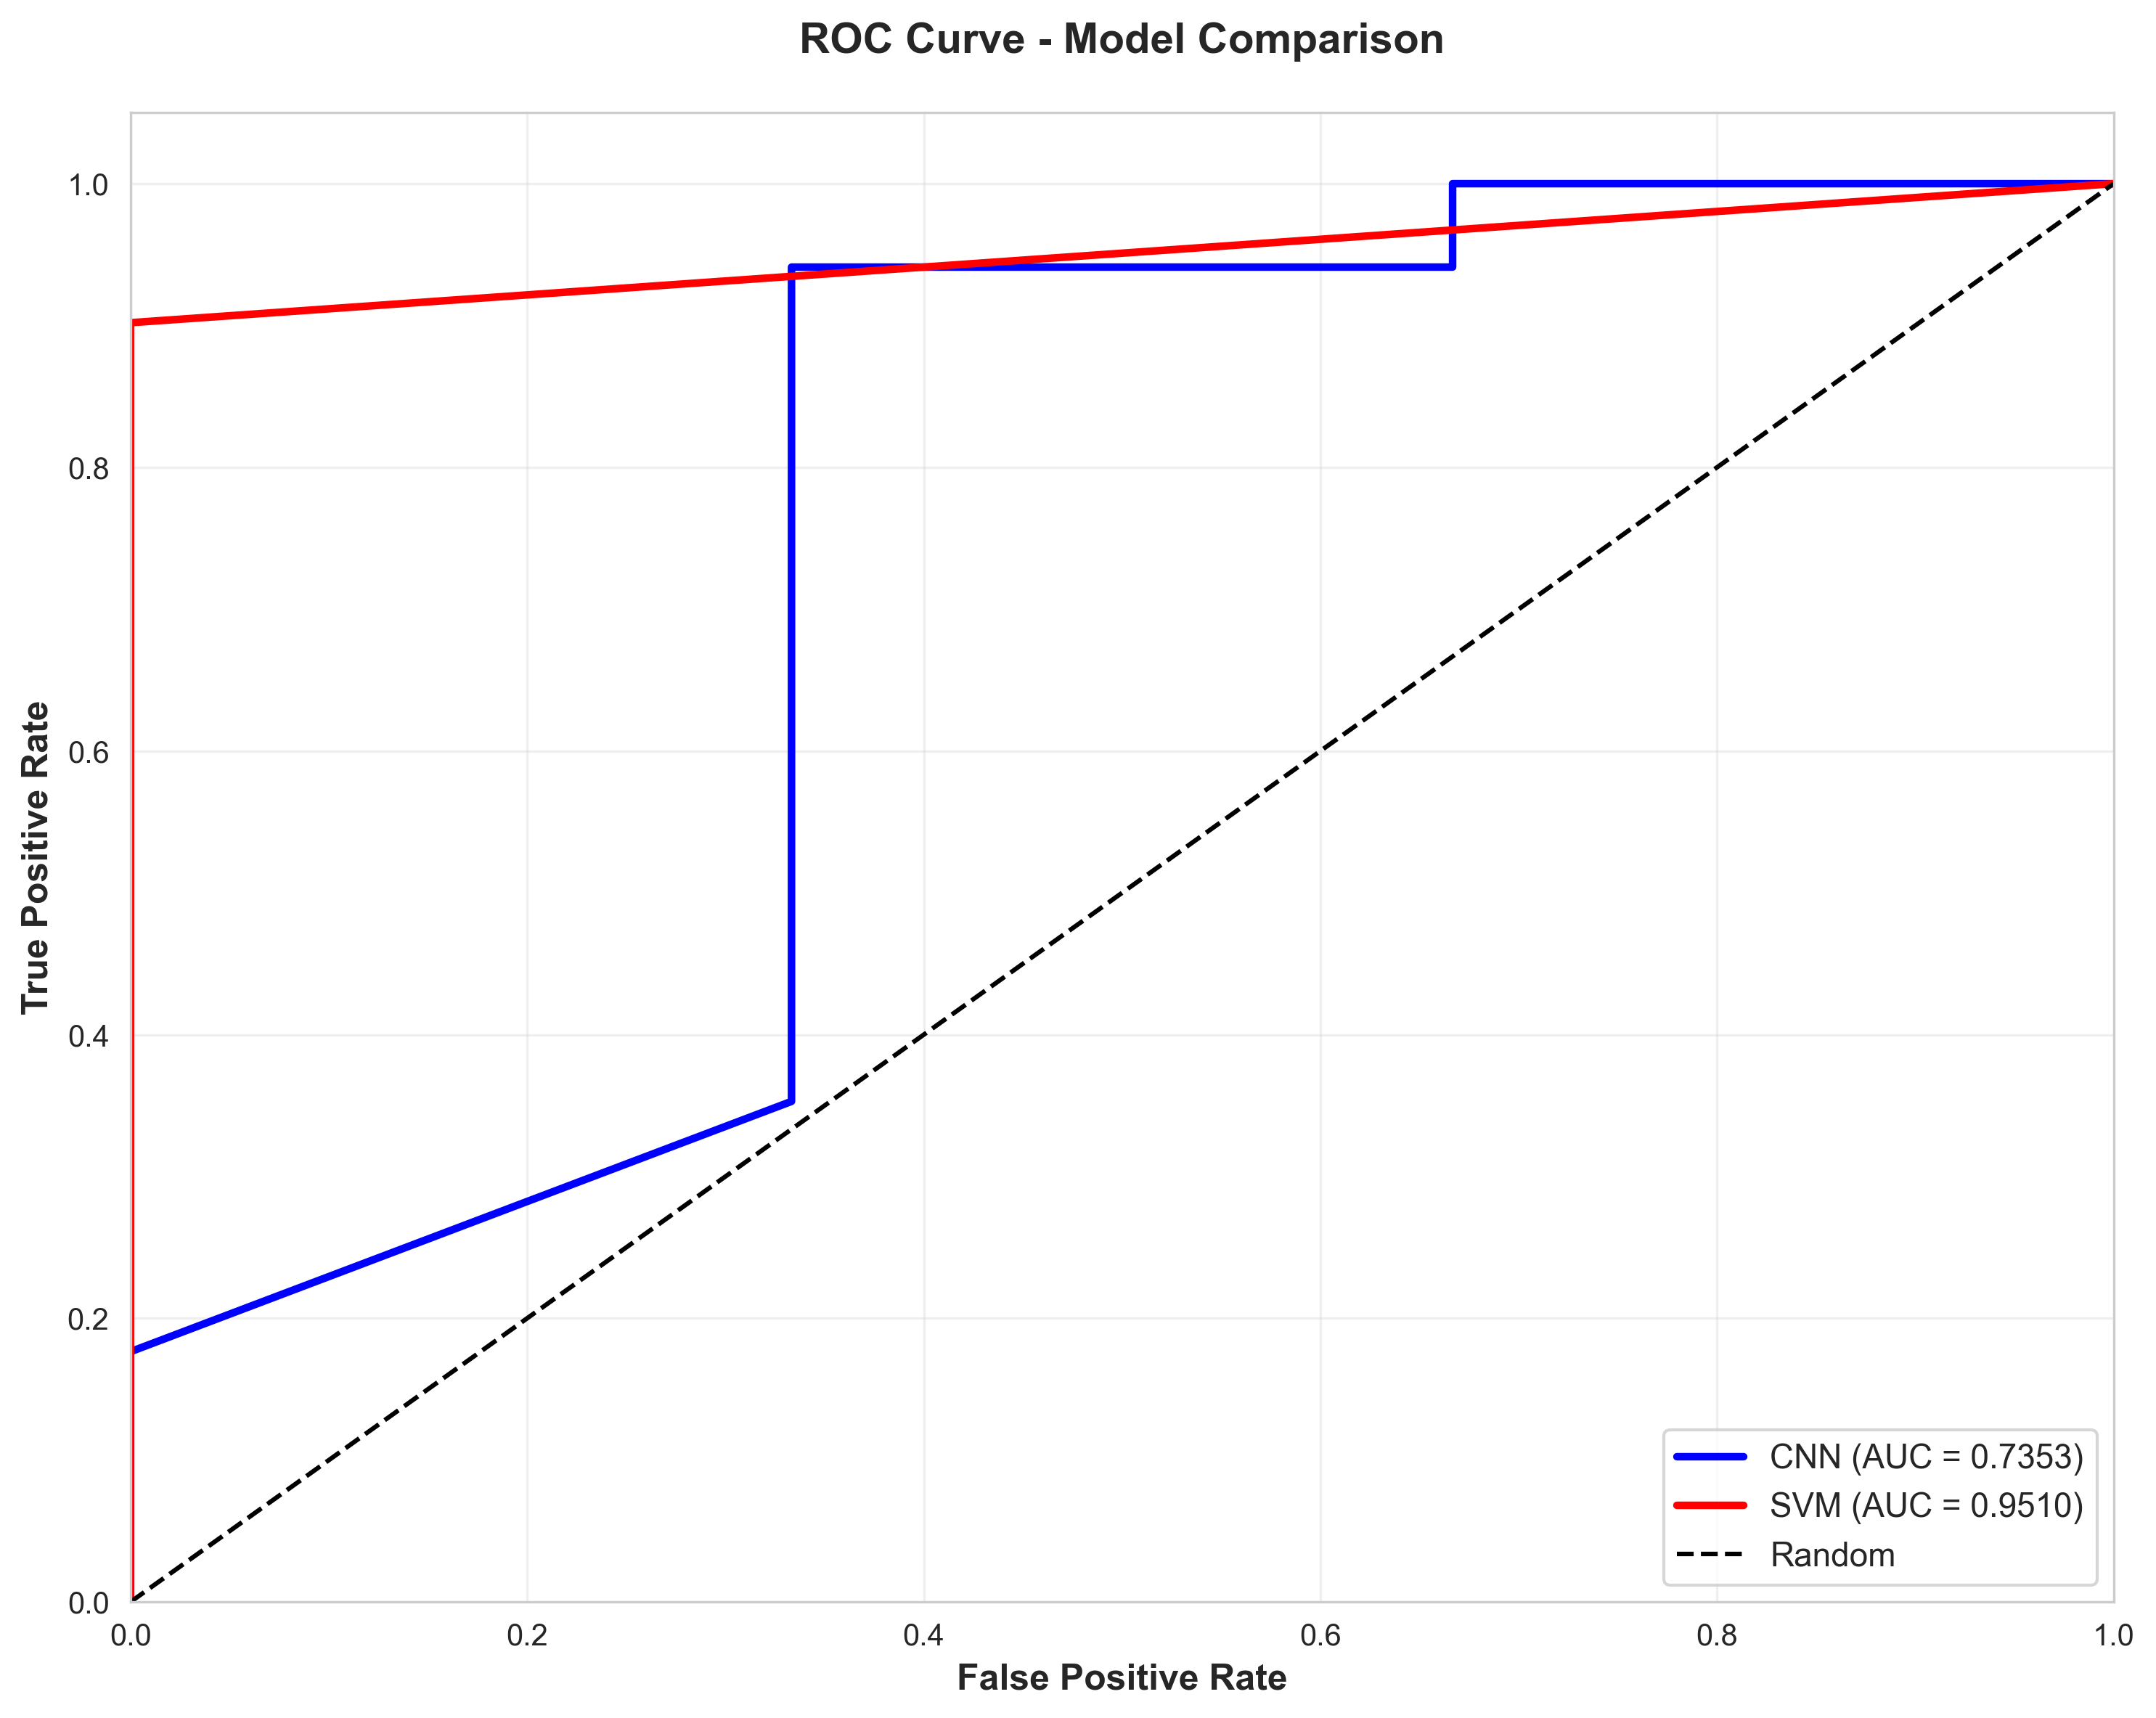

In [8]:
# ROC curve
visualizer.plot_roc_curve(
    cnn_val_results['class_true'],
    cnn_val_results['class_probs'],
    svm_val_metrics['class_pred'] if 'class_pred' in svm_val_metrics else None,
    save_name='roc_curve.png'
)
Image(filename=os.path.join(Config.PLOTS_DIR, 'roc_curve.png'))


In [9]:
# Phase 7: Classification Reports (save + display)
from sklearn.metrics import classification_report

cnn_report = classification_report(
    cnn_val_results['class_true'], cnn_val_results['class_pred'],
    target_names=['Low BMD','Normal'], digits=4
)

svm_report = classification_report(
    svm_val_metrics['class_true'], svm_val_metrics['class_pred'],
    target_names=['Low BMD','Normal'], digits=4
)

# Save
cnn_report_path = os.path.join(Config.RESULTS_DIR, 'cnn_classification_report.txt')
svm_report_path = os.path.join(Config.RESULTS_DIR, 'svm_classification_report.txt')
with open(cnn_report_path, 'w', encoding='utf-8') as f:
    f.write(cnn_report)
with open(svm_report_path, 'w', encoding='utf-8') as f:
    f.write(svm_report)

print(cnn_report)
print(svm_report)
print('Saved to:', cnn_report_path, 'and', svm_report_path)


              precision    recall  f1-score   support

     Low BMD     0.1667    0.6667    0.2667         3
      Normal     0.9762    0.8039    0.8817        51

    accuracy                         0.7963        54
   macro avg     0.5714    0.7353    0.5742        54
weighted avg     0.9312    0.7963    0.8476        54

              precision    recall  f1-score   support

     Low BMD     0.3750    1.0000    0.5455         3
      Normal     1.0000    0.9020    0.9485        51

    accuracy                         0.9074        54
   macro avg     0.6875    0.9510    0.7470        54
weighted avg     0.9653    0.9074    0.9261        54

Saved to: C:/Users/HP/Desktop/BMD Project 01/Outputs/results\cnn_classification_report.txt and C:/Users/HP/Desktop/BMD Project 01/Outputs/results\svm_classification_report.txt


Model comparison saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\model_comparison.png
Prediction scatter saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\prediction_scatter.png
Residuals saved to C:/Users/HP/Desktop/BMD Project 01/Outputs/plots\residuals.png


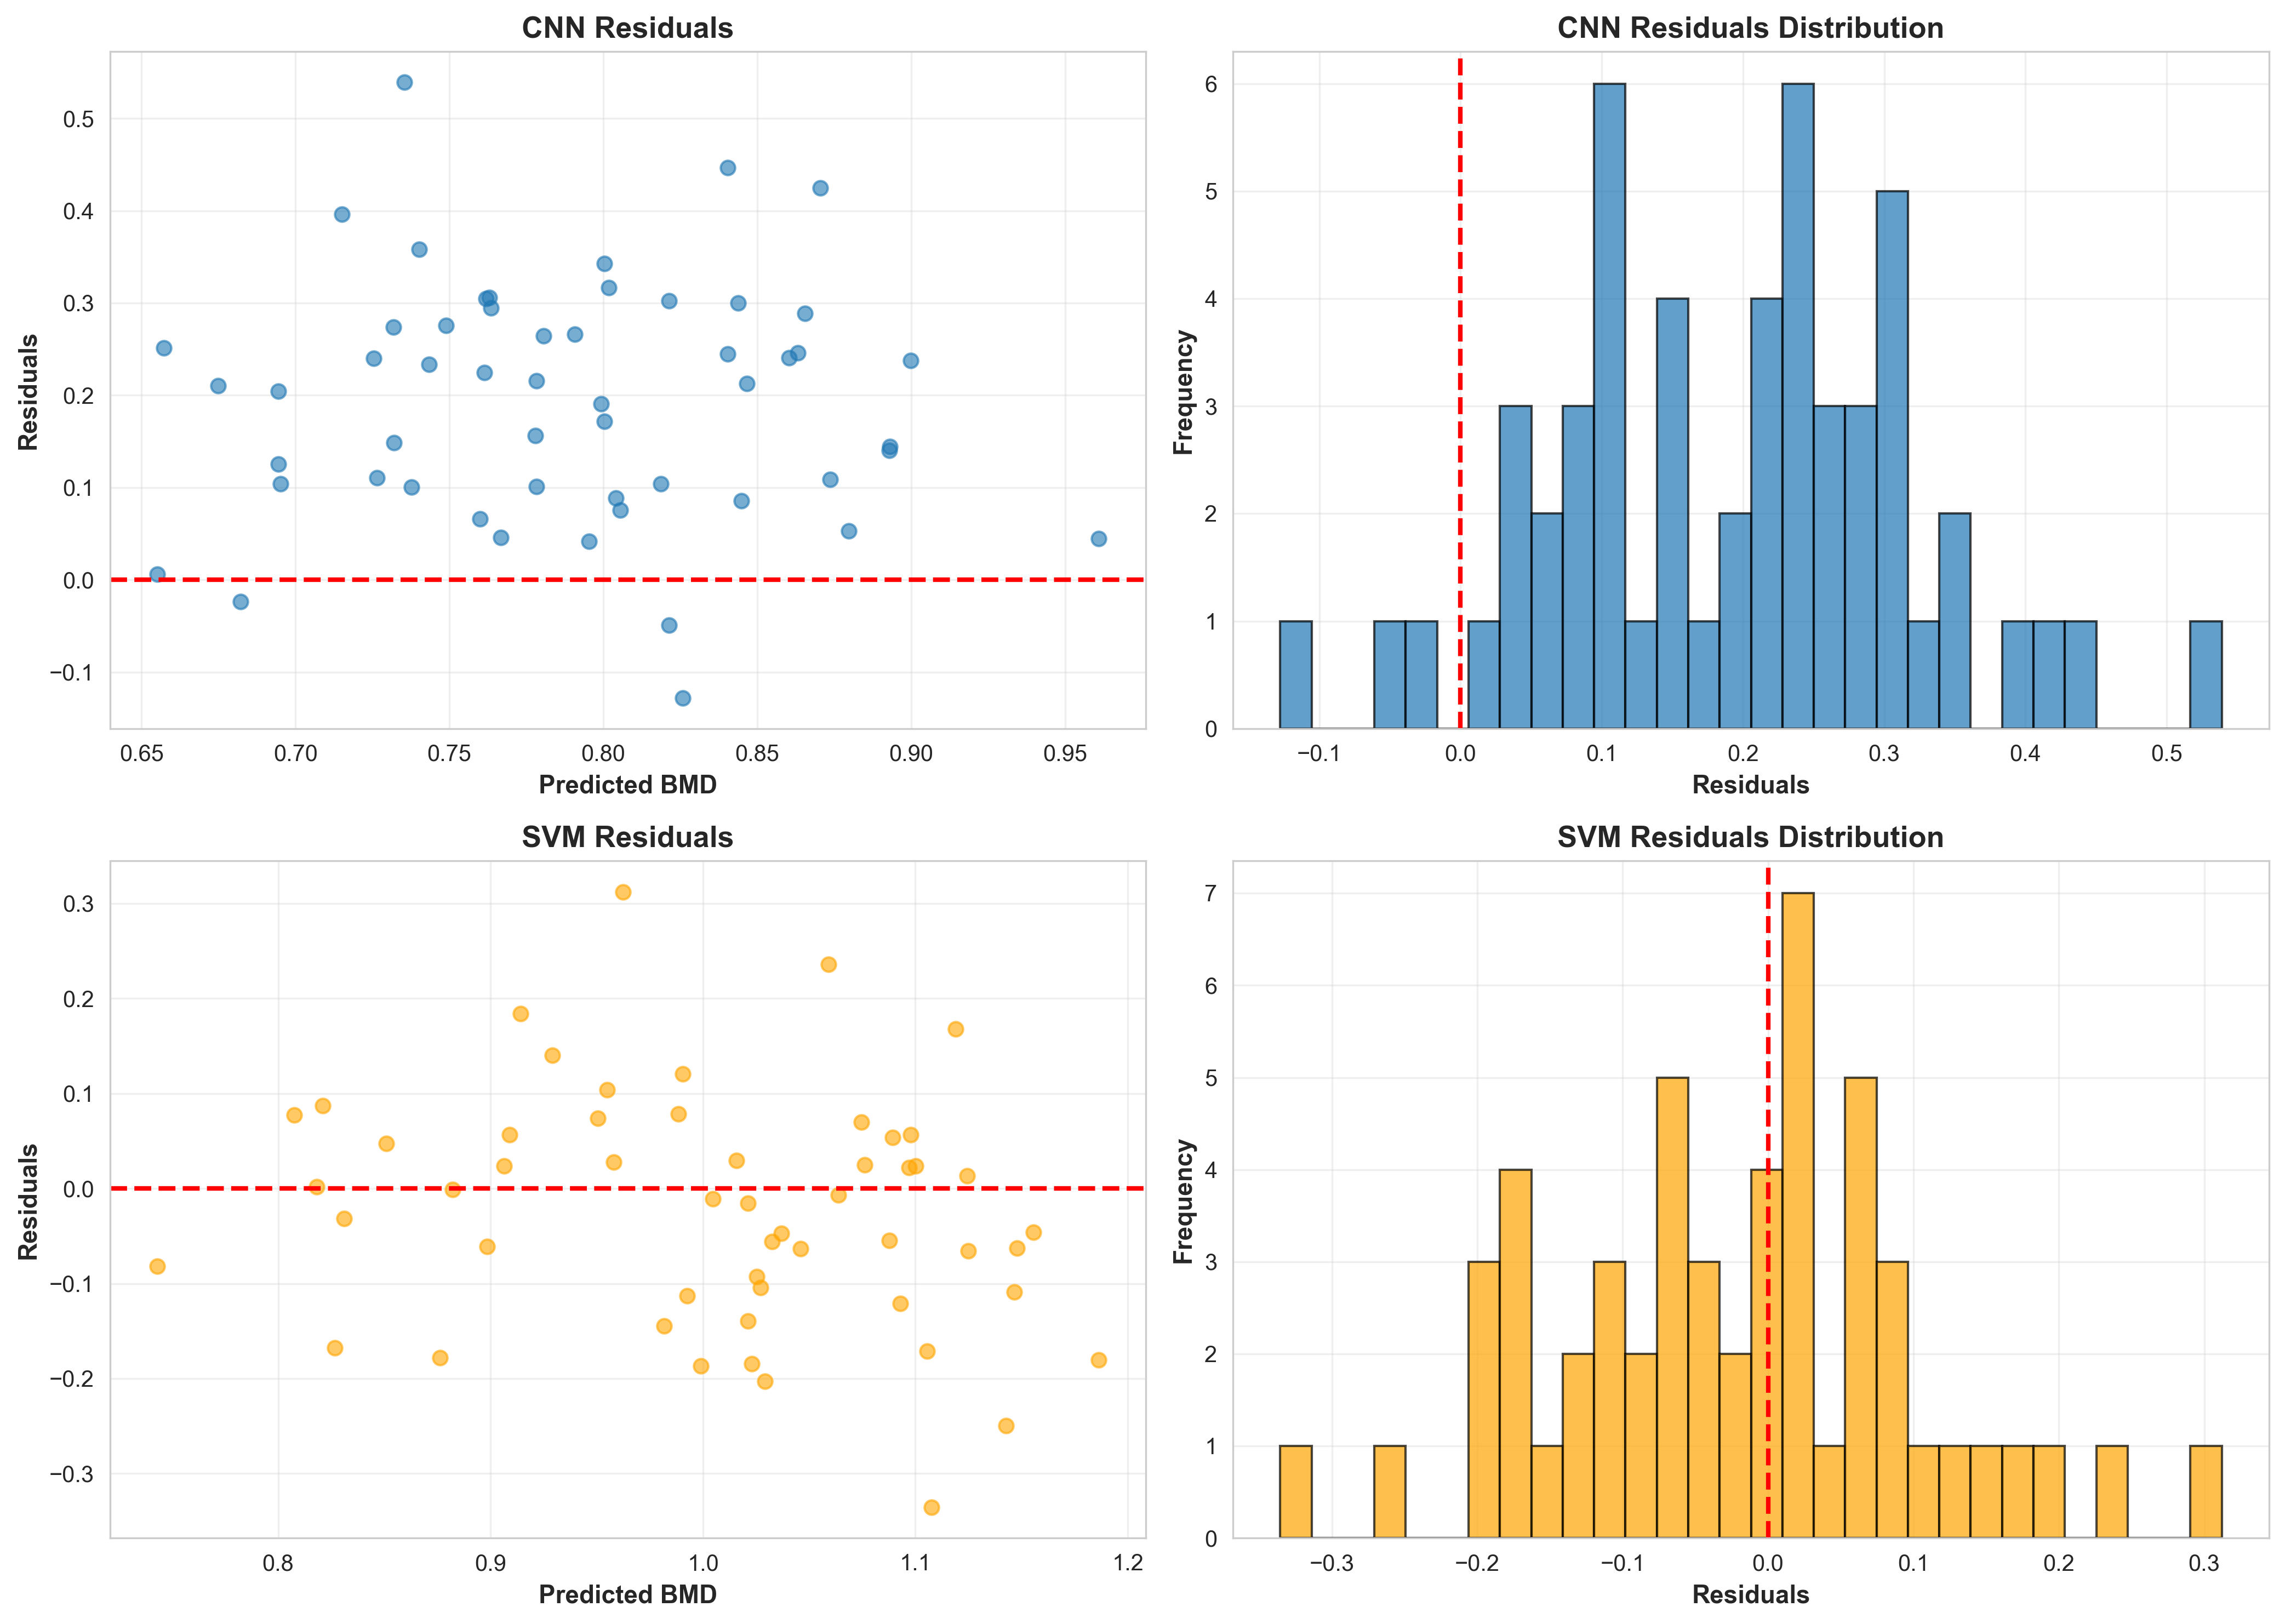

In [10]:
# Phase 8: Model Comparison & Residuals (save + display)

visualizer.plot_model_comparison_bars(cnn_val_results, svm_val_metrics)
Image(filename=os.path.join(Config.PLOTS_DIR, 'model_comparison.png'))

visualizer.plot_prediction_scatter(
    np.array(cnn_val_results['bmd_true']),
    np.array(cnn_val_results['bmd_pred']),
    np.array(svm_val_metrics['bmd_pred'])
)
Image(filename=os.path.join(Config.PLOTS_DIR, 'prediction_scatter.png'))

visualizer.plot_residuals(
    np.array(cnn_val_results['bmd_true']),
    np.array(cnn_val_results['bmd_pred']),
    np.array(svm_val_metrics['bmd_pred'])
)
Image(filename=os.path.join(Config.PLOTS_DIR, 'residuals.png'))


In [11]:
# Phase 9: Test Predictions + Kaggle Submissions (save + show heads)

cnn_test = cnn_trainer.get_predictions(test_loader)
svm_test = svm_model.predict(test_loader)

# Detailed files
cnn_det = pd.DataFrame({
    'image': cnn_test['img_names'],
    'BMD_pred': cnn_test['bmd_pred'],
    'T_Score': [Config.calculate_t_score(b) for b in cnn_test['bmd_pred']],
    'Classification': ['Normal' if c == 1 else 'Low BMD' for c in cnn_test['class_pred']]
})
svm_det = pd.DataFrame({
    'image': svm_test['img_names'],
    'BMD_pred': svm_test['bmd_pred'],
    'T_Score': [Config.calculate_t_score(b) for b in svm_test['bmd_pred']],
    'Classification': ['Normal' if c == 1 else 'Low BMD' for c in svm_test['class_pred']]
})

cnn_det_path = os.path.join(Config.RESULTS_DIR, 'cnn_detailed_predictions_notebook.csv')
svm_det_path = os.path.join(Config.RESULTS_DIR, 'svm_detailed_predictions_notebook.csv')
cnn_det.to_csv(cnn_det_path, index=False)
svm_det.to_csv(svm_det_path, index=False)

# Kaggle format
sub_cnn = pd.DataFrame({'image': cnn_test['img_names'], 'BMD': cnn_test['bmd_pred']})
sub_svm = pd.DataFrame({'image': svm_test['img_names'], 'BMD': svm_test['bmd_pred']})

sub_cnn_path = os.path.join(Config.RESULTS_DIR, 'submission_cnn_notebook.csv')
sub_svm_path = os.path.join(Config.RESULTS_DIR, 'submission_svm_notebook.csv')
sub_cnn.to_csv(sub_cnn_path, index=False)
sub_svm.to_csv(sub_svm_path, index=False)

print('Saved:')
print(' ', cnn_det_path)
print(' ', svm_det_path)
print(' ', sub_cnn_path)
print(' ', sub_svm_path)

display(sub_cnn.head())
display(sub_svm.head())


Predicting: 100%|██████████| 7/7 [00:24<00:00,  3.45s/it]



Extracting features for prediction...


Extracting features: 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]

Saved:
  C:/Users/HP/Desktop/BMD Project 01/Outputs/results\cnn_detailed_predictions_notebook.csv
  C:/Users/HP/Desktop/BMD Project 01/Outputs/results\svm_detailed_predictions_notebook.csv
  C:/Users/HP/Desktop/BMD Project 01/Outputs/results\submission_cnn_notebook.csv
  C:/Users/HP/Desktop/BMD Project 01/Outputs/results\submission_svm_notebook.csv


,image,BMD
0,6.E.1_9095839_20090409_001.png,0.960776
1,6.C.1_9100862_20090219_001.png,0.960809
2,6.C.1_9107980_20090225_001.png,0.971936
3,6.E.1_9266274_20100415_001.png,0.981712
4,6.E.1_9295400_20100510_001.png,0.971762


,image,BMD
0,6.E.1_9095839_20090409_001.png,0.786533
1,6.C.1_9100862_20090219_001.png,0.732215
2,6.C.1_9107980_20090225_001.png,0.984906
3,6.E.1_9266274_20100415_001.png,1.115868
4,6.E.1_9295400_20100510_001.png,0.839617
